In [2]:
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt

In [47]:
engine = sa.create_engine('mssql+pyodbc://sa:sa@123@SKPC-30')


In [48]:
#STARTDATE = '2019-05-01'
#ENDDATE = '2019-06-01'

In [49]:
# total amount for skcode between one month
sql1 = ''' \
SELECT distinct Skcode,
        SUM(TotalAmount) AS amount                                     
    FROM OrderMasters
    where CreatedDate  BETWEEN '2019-05-01' AND '2019-06-01'
    GROUP BY Skcode
          

          '''

In [50]:
df1=pd.read_sql_query(sql1,engine)
df1.head()

,Skcode,amount
0,SK10000,60858.39
1,SK10001,88917.09
2,SK10004,3563.98
3,SK10010,1790.57
4,SK10011,3588.70


In [51]:
df1.loc[df1['Skcode']=='SK10084']


,Skcode,amount
42,SK10084,17814.6


In [52]:
# total number of orders for skcode in one month
sql2 = ''' \
SELECT distinct Skcode,
        COUNT(OrderId) AS numorders                                      
    FROM OrderMasters
    where CreatedDate between '2019-05-01' and '2019-06-01'
    GROUP BY Skcode


          '''

In [53]:
df2=pd.read_sql_query(sql2,engine)
df2.head()

,Skcode,numorders
0,SK10000,5
1,SK10001,9
2,SK10004,2
3,SK10010,1
4,SK10011,2


In [54]:
df2.loc[df2['Skcode']=='SK10084']


,Skcode,numorders
42,SK10084,2


In [55]:
#percentage ordered by self
sql3 = ''' \
SELECT distinct Skcode,
        COUNT(OrderTakenSalesPersonId)   as totalrows  , COUNT(case when OrderTakenSalesPersonId = '0' then 1 else null end)    as byself   ,
		(   COUNT(case when OrderTakenSalesPersonId = '0' then 1 else null end)*100 )/COUNT(OrderTakenSalesPersonId)  as SelfPercentage                                                                                                                               /* total number of orders for skcode between one month*/
    FROM OrderMasters
	where CreatedDate between '2019-05-01' and '2019-06-01' 
    GROUP BY Skcode 


          '''


In [56]:
df3=pd.read_sql_query(sql3,engine)
df3.head()

,Skcode,totalrows,byself,SelfPercentage
0,SK10000,5,2,40
1,SK10001,9,1,11
2,SK10004,2,1,50
3,SK10010,1,0,0
4,SK10011,2,0,0


In [57]:
df3.loc[df3['Skcode']=='SK10084']


,Skcode,totalrows,byself,SelfPercentage
42,SK10084,2,0,0


In [58]:
sql4 = ''' \
select distinct d.Skcode,  COUNT(DISTINCT c.SubSubCode) COUNT_SUBSUBCODE 
	  from OrderMasters a, OrderDetails b, ItemMasterCentrals c, Customers d 
	  where a.OrderId = b.OrderId and b.itemcode = c.itemcode and a.Skcode = d.Skcode and b.CreatedDate between '2019-05-01' and '2019-06-01'
	  GROUP BY d.Skcode 
          '''


In [59]:
df4=pd.read_sql_query(sql4,engine)
df4.head()

,Skcode,COUNT_SUBSUBCODE
0,SK10000,27
1,SK10001,44
2,SK10004,1
3,SK10010,6
4,SK10011,5


In [60]:
df4.loc[df4['Skcode']=='SK10084']


,Skcode,COUNT_SUBSUBCODE
42,SK10084,10


In [61]:
sql5 = ''' \
 select al.Skcode,al.nooforder,al.noofbrand,al.Totalvolume,kk.KKvolume
from 
(
select i.Skcode, count(DISTINCT o.orderid) nooforder,count(DISTINCT o.SubSubCode) noofbrand,isnull(sum(o.TotalAmountAfterTaxDisc),0) Totalvolume 
 from Customers i  
outer apply
(select a.orderid,c.SubSubCode,b.TotalAmountAfterTaxDisc from 
OrderMasters a 
inner join OrderDetails b on a.OrderId=b.OrderId 
inner join ItemMasters c on b.ItemId=c.ItemId 
where  i.CustomerId=a.CustomerId and a.CreatedDate between '2019-05-01' and '2019-06-01') o 
group by i.Skcode
) al
inner join 
(
select i.Skcode,isnull(sum(o.TotalAmountAfterTaxDisc),0) KKvolume from Customers i  
outer apply
(
select c.SubSubCode,b.TotalAmountAfterTaxDisc  
from OrderMasters a 
inner join OrderDetails b on a.OrderId=b.OrderId  
inner join ItemMasters c on b.ItemId=c.ItemId and c.SubSubCode='244'
where  i.CustomerId=a.CustomerId and a.CreatedDate between '2019-05-01' and '2019-06-01' ) o
group by i.Skcode
) kk on al.Skcode=kk.Skcode 

 
          '''


In [62]:
df5=pd.read_sql_query(sql5,engine)
df5

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume
0,SK10000,5,27,61386.369,0.000
1,SK10001,9,44,89863.809,4059.450
2,SK10002,0,0,0.000,0.000
3,SK10003,0,0,0.000,0.000
4,SK10004,2,1,3881.680,3881.680
5,SK10005,0,0,0.000,0.000
6,SK10006,0,0,0.000,0.000
7,SK10007,0,0,0.000,0.000
8,SK10008,0,0,0.000,0.000
9,SK10009,0,0,0.000,0.000


In [63]:
df1.head()

,Skcode,amount
0,SK10000,60858.39
1,SK10001,88917.09
2,SK10004,3563.98
3,SK10010,1790.57
4,SK10011,3588.70


In [64]:
df2.head()

,Skcode,numorders
0,SK10000,5
1,SK10001,9
2,SK10004,2
3,SK10010,1
4,SK10011,2


In [65]:
df3.head()

,Skcode,totalrows,byself,SelfPercentage
0,SK10000,5,2,40
1,SK10001,9,1,11
2,SK10004,2,1,50
3,SK10010,1,0,0
4,SK10011,2,0,0


In [66]:
df4.head()

,Skcode,COUNT_SUBSUBCODE
0,SK10000,27
1,SK10001,44
2,SK10004,1
3,SK10010,6
4,SK10011,5


In [67]:
df11=df1.set_index('Skcode')
df11.head()

,amount
Skcode,
SK10000,60858.39
SK10001,88917.09
SK10004,3563.98
SK10010,1790.57
SK10011,3588.70


In [68]:
df22=df2.set_index('Skcode')
df22.head()

,numorders
Skcode,
SK10000,5
SK10001,9
SK10004,2
SK10010,1
SK10011,2


In [69]:
df33=df3.set_index('Skcode')
df33.head()

,totalrows,byself,SelfPercentage
Skcode,,,
SK10000,5,2,40
SK10001,9,1,11
SK10004,2,1,50
SK10010,1,0,0
SK10011,2,0,0


In [70]:
df44=df4.set_index('Skcode')
df44.head()

,COUNT_SUBSUBCODE
Skcode,
SK10000,27
SK10001,44
SK10004,1
SK10010,6
SK10011,5


In [71]:
df1.head()

,Skcode,amount
0,SK10000,60858.39
1,SK10001,88917.09
2,SK10004,3563.98
3,SK10010,1790.57
4,SK10011,3588.70


In [72]:
df1.sort_values(by='amount',ascending=False).head()


,Skcode,amount
1431,SK16372,2828948.87
3410,SK9884,1126635.17
1149,SK14590,848274.59
163,SK10448,742178.07
869,SK13401,651459.74


In [73]:
df1['Skcode'].head()

0    SK10000
1    SK10001
2    SK10004
3    SK10010
4    SK10011
Name: Skcode, dtype: object

In [74]:
df1.head()

,Skcode,amount
0,SK10000,60858.39
1,SK10001,88917.09
2,SK10004,3563.98
3,SK10010,1790.57
4,SK10011,3588.70


(array([1.214e+03, 2.520e+02, 1.370e+02, 4.500e+01, 1.900e+01, 4.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00]),
 array([  10000,   50000,  100000,  200000,  300000,  400000,  500000,
         600000,  700000,  800000,  900000, 1000000]),
 <a list of 11 Patch objects>)

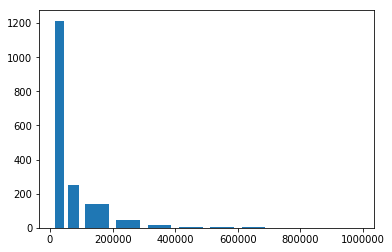

In [75]:
plt.hist(df1['amount'],bins=[10000,50000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000],rwidth=0.75)